# Real-World Insight — Food Production & Economic Evolution (In English)

## Load dataset

In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)
# Configure Plotly renderer for the notebook
pio.renderers.default = 'notebook'

## Data cleaning

In [30]:
df = pd.read_csv("../data/raw/FAO.csv", encoding="latin-1")

# Récupération des colonnes d'années
year_cols = [c for c in df.columns if c.startswith("Y")]

# Conversion des colonnes en numérique (avant le renommage)
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors="coerce")

# Renommage des colonnes
df = df.rename(columns={c: c[1:] for c in year_cols})

# Récupération des nouvelles colonnes (après renommage) et tri numérique
new_year_cols = sorted([c for c in df.columns if c.isdigit()], key=int)

# S'assurer que toutes les colonnes d'années sont en float64 pour la cohérence
df[new_year_cols] = df[new_year_cols].astype(float)

# Suppression des lignes avec des valeurs manquantes
print("\nValeurs manquantes supprimées : \n", df.isna().sum())
df = df.dropna(subset=new_year_cols, how="all")

# Création du dossier si nécessaire
os.makedirs("../data/clean", exist_ok=True)

df.to_csv("../data/clean/fao_clean.csv", index=False)


Valeurs manquantes supprimées : 
 Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
2009                 104
2010                 104
2011                 104
2012                   0
2013                   0
Length: 63, dtype: int64


## Use cleaned dataset

In [31]:
fao_path = "../data/clean/fao_clean.csv"
df = pd.read_csv(fao_path)

# Récupération des colonnes d'années et tri numérique
new_year_cols = sorted([c for c in df.columns if c.isdigit()], key=int)

# Aperçu des données
display(df.head())
display(df.info())

# Vérifier les valeurs manquantes
print(df.isna().sum())

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367.0,360.0
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200.0,200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  1961               17938 non-null  float64
 11  1962               17938 non-null  float64
 12  1963               17938 non-null  float64
 13  1964               17938 non-null  float64
 14  1965               17938 non-null  float64
 15  1966               17938 non-null  float64
 16  1967               179

None

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
2009                 104
2010                 104
2011                 104
2012                   0
2013                   0
Length: 63, dtype: int64


### Ajout de colonnes utiles

In [32]:
# Créer production totale (somme des années pour chaque pays/produit)
df["Production_totale"] = df[new_year_cols].sum(axis=1)

# Calculer la croissance annuelle en pourcentage de façon vectorisée
# Utiliser pct_change(axis=1) sur les colonnes d'années pour éviter d'écraser les valeurs originales.
years_df = df[new_year_cols].astype(float)
growth_pct = years_df.pct_change(axis=1) * 100
# Garder les mêmes noms de colonnes (les premières colonnes seront NaN)
growth_pct.columns = new_year_cols
# Ajouter la croissance moyenne par ligne (produit/pays) en %
df['growth_mean'] = growth_pct.replace([np.inf, -np.inf], np.nan).mean(axis=1)

# Aperçu des résultats
display(growth_pct.head())
display(df[['Production_totale', 'growth_mean']].head())

C:\Users\axela\AppData\Local\Temp\ipykernel_3420\3709952802.py:7: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,NaN,-1.244813,-12.500000,17.046819,2.615385,-9.645177,13.550885,-0.389674,5.330073,-15.552461,...,4.975767,7.294552,6.253586,12.419006,2.113353,6.726246,1.476421,2.301846,2.101465,1.767152
1,NaN,0.000000,-0.546448,20.879121,0.000000,-11.363636,18.461538,1.731602,1.276596,-10.504202,...,-8.913043,6.205251,22.696629,-16.666667,7.692308,-15.306122,6.506024,7.692308,-10.714286,-0.705882
2,NaN,0.000000,0.000000,0.000000,0.000000,-1.315789,-5.333333,1.408451,1.388889,1.369863,...,20.833333,306.896552,11.016949,0.381679,-12.547529,64.782609,-16.886544,-35.555556,80.788177,-1.907357
3,NaN,0.000000,0.000000,0.421941,0.000000,-0.420168,-5.063291,0.888889,1.321586,1.739130,...,28.472222,-76.756757,2.325581,9.090909,29.166667,-11.290323,9.090909,20.000000,8.333333,14.102564
4,NaN,0.000000,1.904762,0.934579,0.000000,0.000000,8.796296,-1.276596,1.724138,-15.254237,...,90.476190,73.333333,12.019231,6.866953,-0.803213,-21.052632,-8.717949,7.303371,4.712042,0.000000


,Production_totale,growth_mean
0,132926.0,2.178588
1,15282.0,2.371391
2,5190.0,8.738545
3,8529.0,0.351269
4,9451.0,2.585005


## Analyse descriptive

In [33]:
# Top 10 pays producteurs sur la dernière année disponible
last_year = new_year_cols[-1]
top_countries = df.groupby("Area")[last_year].sum().sort_values(ascending=False).head(10)
print("Top 10 pays producteurs en", last_year)
print(top_countries)

Top 10 pays producteurs en 2013
Area
China, mainland             3191155.0
India                       1336593.0
United States of America     938639.0
Brazil                       439967.0
Russian Federation           370913.0
Nigeria                      300923.0
Indonesia                    256888.0
Germany                      218891.0
Mexico                       210121.0
Pakistan                     190505.0
Name: 2013, dtype: float64


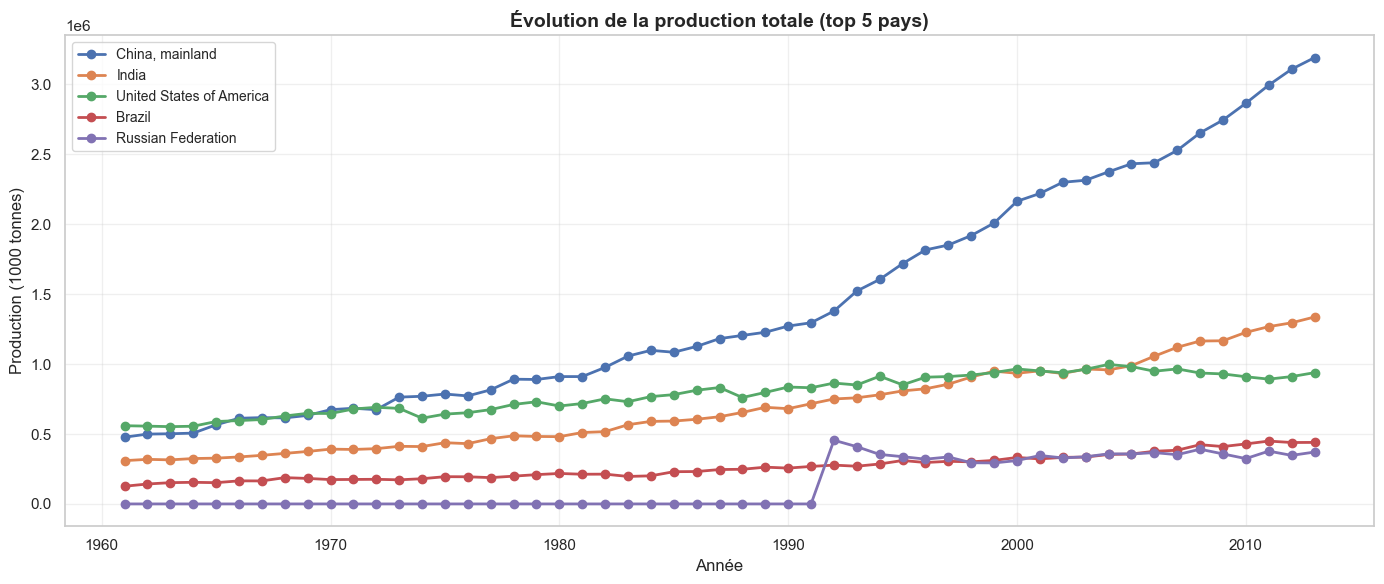

In [34]:
# Graphique ligne de la production totale des 5 premiers pays (agrégation par Area)
top5_countries = top_countries.index[:5]
plt.figure(figsize=(14,6))
years = [int(y) for y in new_year_cols]
for country in top5_countries:
    # Somme par année pour le pays (somme sur tous les items/produits)
    country_series = df[df['Area'] == country][new_year_cols].sum(axis=0).astype(float).values
    plt.plot(years, country_series, label=country, marker='o', linewidth=2)
plt.title('Évolution de la production totale (top 5 pays)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Production (1000 tonnes)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

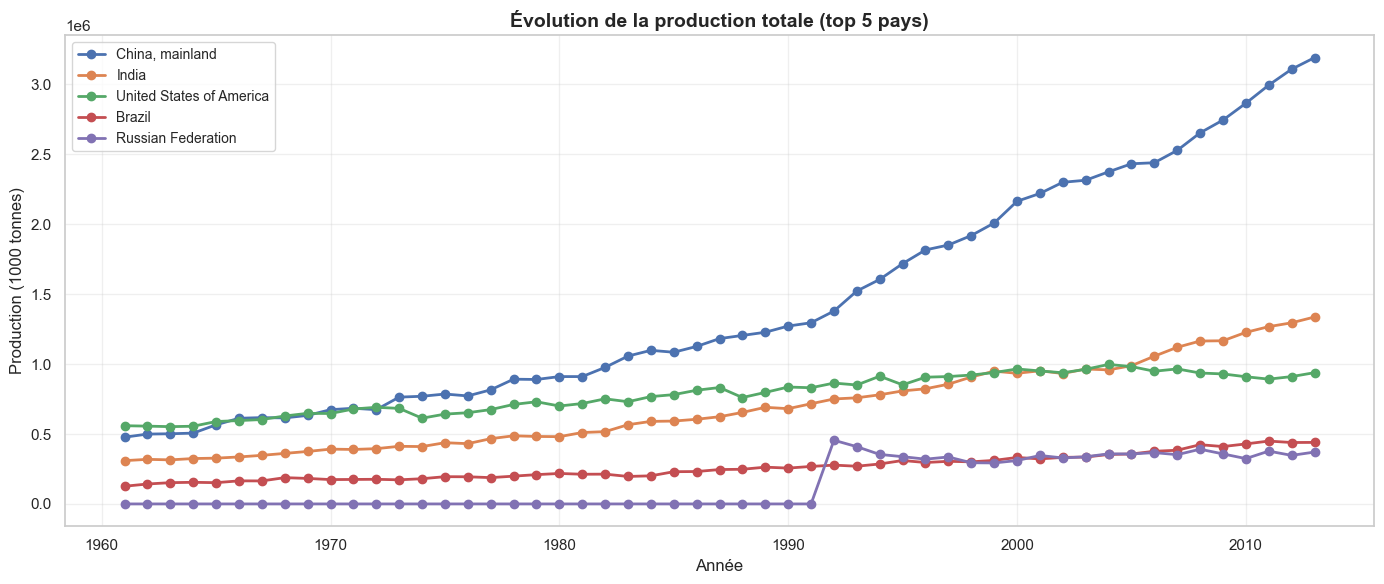

In [35]:
# Graphique ligne de la production totale des 5 premiers pays (agrégation par Area)
top5_countries = top_countries.index[:5]
plt.figure(figsize=(14,6))
years = [int(y) for y in new_year_cols]
for country in top5_countries:
    # Somme par année pour le pays (somme sur tous les items/produits)
    country_series = df[df['Area'] == country][new_year_cols].sum(axis=0).astype(float).values
    plt.plot(years, country_series, label=country, marker='o', linewidth=2)
plt.title('Évolution de la production totale (top 5 pays)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Production (1000 tonnes)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analyse économique

In [36]:
# Croissance moyenne annuelle par pays (en excluant les inf et nan)
# Utiliser 'growth_mean' déjà calculée précédemment par ligne (produit/pays)
# Agréger par pays et calculer la moyenne en excluant inf/-inf et NaN
growth_by_country = df.groupby('Area')['growth_mean'].mean().replace([np.inf, -np.inf], np.nan).dropna()
top_growth = growth_by_country.sort_values(ascending=False).head(10)
print('Top 10 pays avec la croissance moyenne annuelle la plus élevée')
print(top_growth)

Top 10 pays avec la croissance moyenne annuelle la plus élevée
Area
Iran (Islamic Republic of)    33.309495
Tajikistan                    30.001170
Thailand                      27.752810
Algeria                       25.830734
Republic of Korea             24.418130
Ukraine                       20.724725
Germany                       16.630807
Netherlands                   16.491882
Bosnia and Herzegovina        15.642392
Uzbekistan                    15.041542
Name: growth_mean, dtype: float64


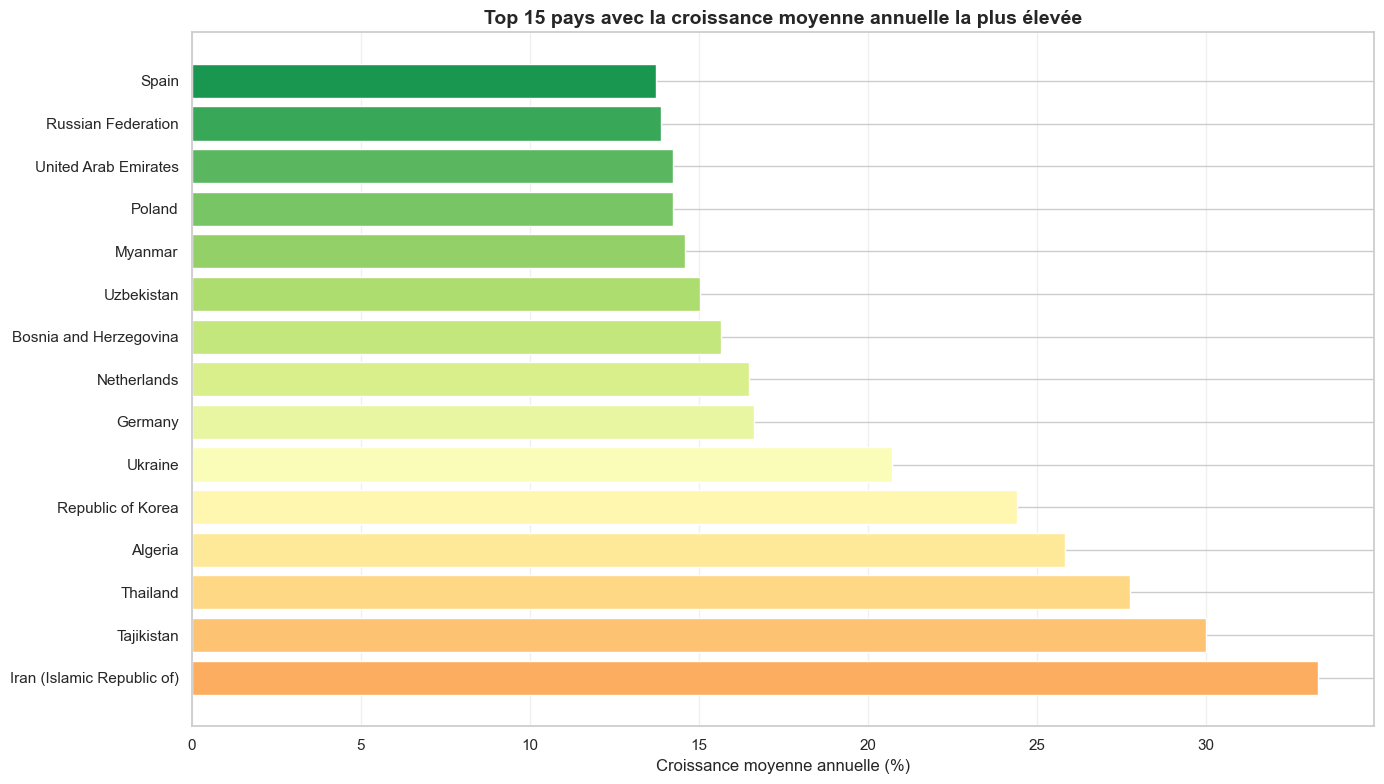

In [37]:
# Visualisation : croissance moyenne par pays
# Filtrer les valeurs infinies et NaN
growth_by_country = df.groupby("Area")['growth_mean'].mean().sort_values(ascending=False)
growth_by_country = growth_by_country.replace([np.inf, -np.inf], np.nan).dropna()

# Prendre les top 15 pour une meilleure lisibilité
top_growth_viz = growth_by_country.head(15)

plt.figure(figsize=(14, 8))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_growth_viz)))
bars = plt.barh(range(len(top_growth_viz)), top_growth_viz.values, color=colors)
plt.yticks(range(len(top_growth_viz)), top_growth_viz.index)
plt.xlabel("Croissance moyenne annuelle (%)", fontsize=12)
plt.title("Top 15 pays avec la croissance moyenne annuelle la plus élevée", fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Clustering

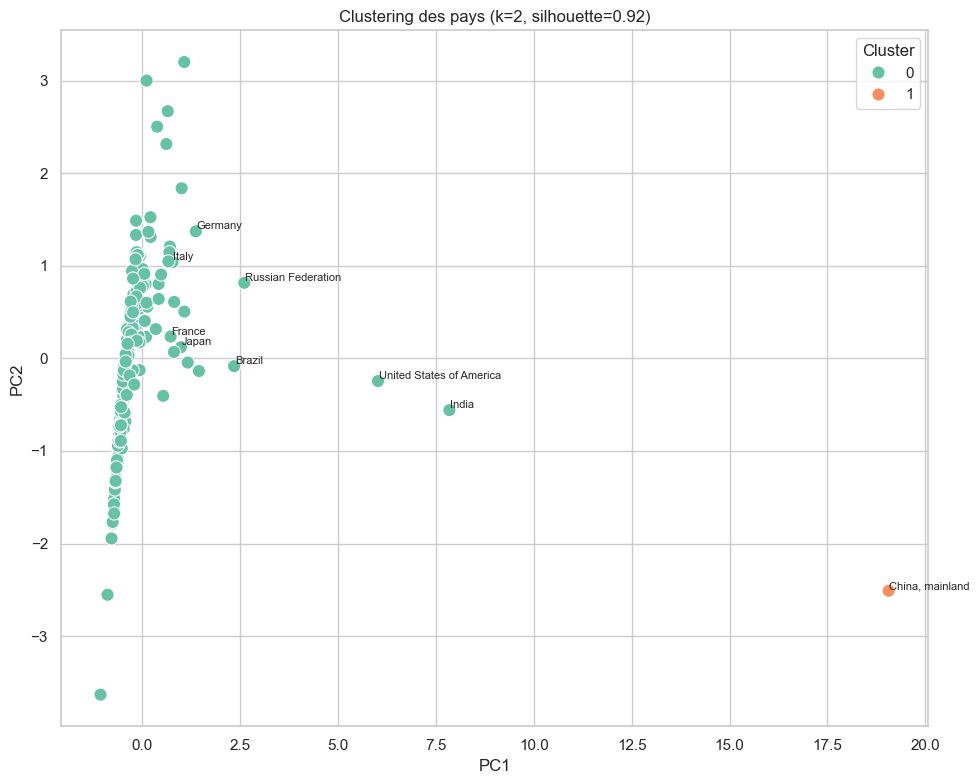

Taille des clusters :
cluster
0    173
1      1
Name: count, dtype: int64


,prod_mean,prod_std,prod_last,growth_mean,cluster,pc1,pc2
Area,,,,,,,
Afghanistan,13003.056604,3811.765805,23007.0,5.889420,0,-0.258479,0.446070
Albania,4475.509434,2002.758181,8271.0,-6.552724,0,-0.557097,-0.855613
Algeria,28879.490566,17954.826369,72161.0,25.830734,0,0.377097,2.503485
Angola,13321.056604,11268.469523,48639.0,3.624091,0,-0.180362,0.184771
Antigua and Barbuda,83.886792,18.663684,119.0,-32.910487,0,-1.069485,-3.631859
Argentina,61890.056604,10490.010093,80843.0,4.413640,0,0.094265,0.232756
Armenia,2221.566038,2755.649055,7175.0,3.683283,0,-0.383499,0.226198
Australia,42907.283019,12321.387713,62446.0,9.684429,0,0.084974,0.803350
Austria,24073.905660,677.945745,24990.0,4.594324,0,-0.257687,0.307923


In [38]:
# Clustering des pays selon leur profil de production
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Construire des features au niveau pays (agrégation par Area)
area_ts = df.groupby('Area')[new_year_cols].sum()
growth_country = df.groupby('Area')['growth_mean'].mean()
features = pd.DataFrame({
    'prod_mean': area_ts.mean(axis=1),
    'prod_std': area_ts.std(axis=1),
    'prod_last': area_ts[new_year_cols[-1]],
    'growth_mean': growth_country
})
# Nettoyer inf/nan et conserver pays avec données complètes
features = features.replace([np.inf, -np.inf], np.nan).dropna()

# Standardiser les features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Sélectionner k via silhouette entre 2 et 6
best_k = 3
best_score = -1
best_labels = None
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_k = k
        best_score = score
        best_labels = labels

# Attacher les labels au dataframe de features
features['cluster'] = best_labels

# Réduction de dimension pour visualisation
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X)
features['pc1'] = coords[:, 0]
features['pc2'] = coords[:, 1]

# Visualisation des clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=features, x='pc1', y='pc2', hue='cluster', palette='Set2', s=90)
for i, country in enumerate(features.index):
    # Annoter quelques pays représentatifs (grands producteurs)
    if features['prod_mean'].iloc[i] >= features['prod_mean'].quantile(0.95):
        plt.text(features['pc1'].iloc[i] + 0.02, features['pc2'].iloc[i] + 0.02, country, fontsize=8)
plt.title(f'Clustering des pays (k={best_k}, silhouette={best_score:.2f})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
# Sauvegarder la figure
os.makedirs('../figures', exist_ok=True)
plt.savefig('../figures/country_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Afficher quelques informations utiles
print('Taille des clusters :')
print(features['cluster'].value_counts())
display(features.sort_values('cluster').head(10))

## Sauvegarde des visuels

In [39]:
# Créer le dossier figures s'il n'existe pas
os.makedirs('../figures', exist_ok=True)

# Sauvegarder les graphiques (recréer les mêmes tracés que ci-dessus)
# Graphique 1: Production des top 5 pays (agrégation par Area)
top5_countries = top_countries.index[:5]
plt.figure(figsize=(14,6))
years = [int(y) for y in new_year_cols]
for country in top5_countries:
    country_series = df[df['Area'] == country][new_year_cols].sum(axis=0).astype(float).values
    plt.plot(years, country_series, label=country, marker='o', linewidth=2)
plt.title('Évolution de la production totale (top 5 pays)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Production (1000 tonnes)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/top5_production.png', dpi=300, bbox_inches='tight')
plt.close()

# Graphique 2: Croissance moyenne par pays (basée sur 'growth_mean')
growth_by_country = df.groupby('Area')['growth_mean'].mean().sort_values(ascending=False)
growth_by_country = growth_by_country.replace([np.inf, -np.inf], np.nan).dropna()
top_growth_viz = growth_by_country.head(15)

plt.figure(figsize=(14, 8))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_growth_viz)))
plt.barh(range(len(top_growth_viz)), top_growth_viz.values, color=colors)
plt.yticks(range(len(top_growth_viz)), top_growth_viz.index)
plt.xlabel('Croissance moyenne annuelle (%)', fontsize=12)
plt.title('Top 15 pays avec la croissance moyenne annuelle la plus élevée', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/growth_barplot.png', dpi=300, bbox_inches='tight')
plt.close()

print('Graphiques sauvegardés dans le dossier figures/')

Graphiques sauvegardés dans le dossier figures/
